In [1]:
#importing dependices
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#displaying all the rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#using pandas to read the database stored in same folder
data = pd.read_csv('marscrater_pds.csv',low_memory = False)
print(len(data))            
print(len(data.columns))    

384343
10


In [4]:
#Upper case all DataFrame column names
data.columns = map(str.upper,data.columns)

In [5]:
#Bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

In [6]:
#Type of each column
data.dtypes

CRATER_ID                  object
CRATER_NAME                object
LATITUDE_CIRCLE_IMAGE     float64
LONGITUDE_CIRCLE_IMAGE    float64
DIAM_CIRCLE_IMAGE         float64
DEPTH_RIMFLOOR_TOPOG      float64
MORPHOLOGY_EJECTA_1        object
MORPHOLOGY_EJECTA_2        object
MORPHOLOGY_EJECTA_3        object
NUMBER_LAYERS               int64
dtype: object

In [7]:
# using value counts function to generate frequency distributions for depth of craters variable
print("Counts for \"DEPTH_RIMFLOOR_TOPOG\" variable...")
drt = data["DEPTH_RIMFLOOR_TOPOG"].value_counts(sort = True,dropna = True)
print(drt)

Counts for "DEPTH_RIMFLOOR_TOPOG" variable...
0.000000     307529
0.070000       2059
0.080000       2047
0.090000       2008
0.100000       1999
0.110000       1953
0.060000       1895
0.120000       1853
0.130000       1763
0.050000       1743
0.040000       1644
0.140000       1632
0.150000       1627
0.160000       1541
0.170000       1435
0.180000       1365
0.190000       1363
0.030000       1301
0.210000       1247
0.200000       1201
0.220000       1189
0.230000       1110
0.250000       1091
0.240000       1040
0.260000       1021
0.270000       1004
0.280000        934
0.290000        930
0.300000        915
0.020000        862
0.320000        846
0.330000        833
0.310000        827
0.340000        816
0.380000        799
0.350000        798
0.360000        789
0.370000        761
0.390000        731
0.410000        730
0.400000        717
0.440000        698
0.420000        687
0.430000        684
0.450000        681
0.470000        657
0.460000        631
0.490000      

In [8]:
# using value counts function to generate frequency distributions
print("Counts for \"DIAM_CIRCLE_IMAGE\" variable...")
dci = data["DIAM_CIRCLE_IMAGE"].value_counts(sort = True,dropna = False)
print(dci)

Counts for "DIAM_CIRCLE_IMAGE" variable...
1.010000       6298
1.020000       6077
1.030000       6035
1.040000       5941
1.050000       5771
1.060000       5556
1.070000       5454
1.080000       5418
1.090000       5197
1.100000       5088
1.110000       4884
1.120000       4846
1.130000       4687
1.150000       4559
1.140000       4457
1.160000       4396
1.180000       4265
1.170000       4250
1.190000       3996
1.200000       3981
1.210000       3899
1.220000       3754
1.240000       3697
1.230000       3650
1.260000       3524
1.250000       3486
1.270000       3428
1.280000       3240
1.300000       3145
1.000000       3129
1.290000       3069
1.320000       3029
1.310000       2984
1.340000       2915
1.330000       2888
1.360000       2737
1.350000       2707
1.370000       2645
1.380000       2555
1.390000       2467
1.400000       2428
1.420000       2388
1.410000       2363
1.430000       2360
1.440000       2210
1.450000       2185
1.470000       2121
1.480000       21

In [9]:
#managing data by replacing 0 value to NAN
data['NUMBER_LAYERS'] = data['NUMBER_LAYERS'].replace(0, np.nan)

# using value counts function to generate frequency distributions
des1 = data["NUMBER_LAYERS"].value_counts(sort = True, dropna = False)
print(des1)

nan         364612
1.000000     15467
2.000000      3435
3.000000       739
4.000000        85
5.000000         5
Name: NUMBER_LAYERS, dtype: int64


In [10]:
#managing data by replacing 0 value to NAN and then generating frequency distributions
data['DEPTH_RIMFLOOR_TOPOG'] = data['DEPTH_RIMFLOOR_TOPOG'].replace(0.000000, np.nan)
drt = data['DEPTH_RIMFLOOR_TOPOG'].value_counts(sort = True, dropna = False)
print(drt)

nan          307529
0.070000       2059
0.080000       2047
0.090000       2008
0.100000       1999
0.110000       1953
0.060000       1895
0.120000       1853
0.130000       1763
0.050000       1743
0.040000       1644
0.140000       1632
0.150000       1627
0.160000       1541
0.170000       1435
0.180000       1365
0.190000       1363
0.030000       1301
0.210000       1247
0.200000       1201
0.220000       1189
0.230000       1110
0.250000       1091
0.240000       1040
0.260000       1021
0.270000       1004
0.280000        934
0.290000        930
0.300000        915
0.020000        862
0.320000        846
0.330000        833
0.310000        827
0.340000        816
0.380000        799
0.350000        798
0.360000        789
0.370000        761
0.390000        731
0.410000        730
0.400000        717
0.440000        698
0.420000        687
0.430000        684
0.450000        681
0.470000        657
0.460000        631
0.490000        621
0.500000        590
0.480000        581


In [11]:
#analyzing basic statistical details
data['DEPTH_RIMFLOOR_TOPOG'].describe()

count   76814.000000
mean        0.379457
std         0.360991
min        -0.420000
25%         0.120000
50%         0.270000
75%         0.520000
max         4.950000
Name: DEPTH_RIMFLOOR_TOPOG, dtype: float64

In [12]:
#creating categories within individual variables
data['DEPTH_RIMFLOOR'] = pd.cut(data.DEPTH_RIMFLOOR_TOPOG, [0,0.500000,1.000000,2.000000,3.000000,4.950000])

In [13]:
#change format to categorical
data['DEPTH_RIMFLOOR'] = data['DEPTH_RIMFLOOR'].astype('category')

In [14]:
#analyzing basic statistical details
data['DEPTH_RIMFLOOR'].describe()

count          76804
unique             5
top       (0.0, 0.5]
freq           56653
Name: DEPTH_RIMFLOOR, dtype: object

In [15]:
#visualizing Frequency distributions
data['DEPTH_RIMFLOOR'].value_counts(sort = False, dropna = False)

(0.0, 0.5]      56653
(0.5, 1.0]      15343
(1.0, 2.0]       4490
(2.0, 3.0]        302
(3.0, 4.95]        16
NaN            307539
Name: DEPTH_RIMFLOOR, dtype: int64

Text(0.5, 1.0, 'Average elevation of each of the manually deteremined N points along(or inside) the crater rim(in km)')

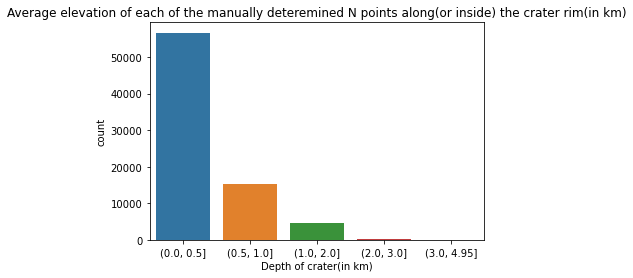

In [16]:
#univariate graph for categorical variable
sns.countplot(x = 'DEPTH_RIMFLOOR', data = data)
plt.xlabel('Depth of crater(in km)')
plt.title("Average elevation of each of the manually deteremined N points along(or inside) the crater rim(in km)")

Text(0.5, 1.0, 'The maximum number of cohesive layers in any azimuthal direction that could be reliably identified')

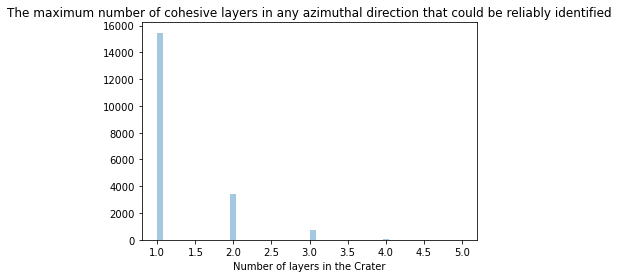

In [17]:
#Univariate histogram for "NUMBER_LAYERS" variable
sns.distplot(data["NUMBER_LAYERS"].dropna(),kde = False)
plt.xlabel('Number of layers in the Crater')
plt.title("The maximum number of cohesive layers in any azimuthal direction that could be reliably identified")

Text(0.5, 1.0, 'Average elevation of each of the manually deteremined N points along(or inside) the crater rim(in km)')

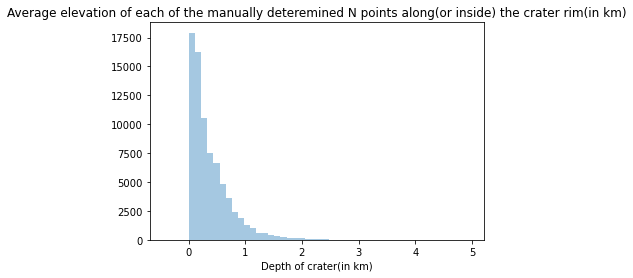

In [18]:
#Univariate Histogram for "DEPTH_RIMFLOOR_TOPOG" variable
sns.distplot(data['DEPTH_RIMFLOOR_TOPOG'].dropna(),kde = False)
plt.xlabel('Depth of crater(in km)')
plt.title("Average elevation of each of the manually deteremined N points along(or inside) the crater rim(in km)")

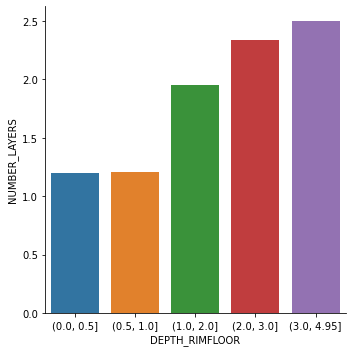

In [19]:
#bi-variate graph to analyze relationship between two variables
sns.catplot(x = 'DEPTH_RIMFLOOR', y = 'NUMBER_LAYERS', data = data, kind = "bar", ci = None)

AxesSubplot(0.125,0.125;0.775x0.755)


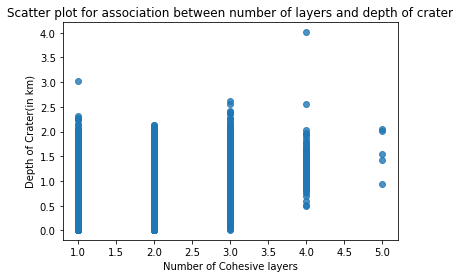

In [20]:
#Scatter plot to understand the relationship between NUMBER_LAYERS and DEPTH_RIMFLOOR_TOPOG
p1 = sns.regplot(y = 'DEPTH_RIMFLOOR_TOPOG',x = 'NUMBER_LAYERS', fit_reg = False ,data = data)
plt.ylabel('Depth of Crater(in km)')
plt.xlabel('Number of Cohesive layers')
plt.title('Scatter plot for association between number of layers and depth of crater')
print(p1)

In [21]:
#visualzing Frequency distributions
data['DIAM_CIRCLE_IMAGE'].value_counts(sort = True, dropna = False)

1.010000       6298
1.020000       6077
1.030000       6035
1.040000       5941
1.050000       5771
1.060000       5556
1.070000       5454
1.080000       5418
1.090000       5197
1.100000       5088
1.110000       4884
1.120000       4846
1.130000       4687
1.150000       4559
1.140000       4457
1.160000       4396
1.180000       4265
1.170000       4250
1.190000       3996
1.200000       3981
1.210000       3899
1.220000       3754
1.240000       3697
1.230000       3650
1.260000       3524
1.250000       3486
1.270000       3428
1.280000       3240
1.300000       3145
1.000000       3129
1.290000       3069
1.320000       3029
1.310000       2984
1.340000       2915
1.330000       2888
1.360000       2737
1.350000       2707
1.370000       2645
1.380000       2555
1.390000       2467
1.400000       2428
1.420000       2388
1.410000       2363
1.430000       2360
1.440000       2210
1.450000       2185
1.470000       2121
1.480000       2101
1.460000       2092
1.490000       1998


In [22]:
#basic statistical details
data['DIAM_CIRCLE_IMAGE'].describe()

count   384343.000000
mean         3.556686
std          8.591993
min          1.000000
25%          1.180000
50%          1.530000
75%          2.550000
max       1164.220000
Name: DIAM_CIRCLE_IMAGE, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


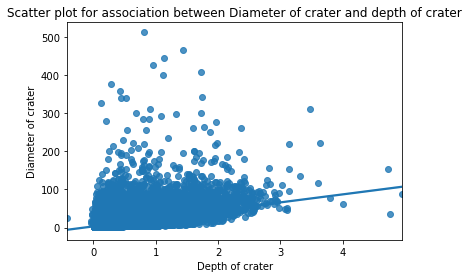

In [23]:
#Scatter plot to understand the relationship between DIAM_CIRCLE_IMAGE and DEPTH_RIMFLOOR_TOPOG
p2 = sns.regplot( y= 'DIAM_CIRCLE_IMAGE',x = 'DEPTH_RIMFLOOR_TOPOG', fit_reg = True , data = data)
plt.ylabel('Diameter of crater')
plt.xlabel('Depth of crater')
plt.title('Scatter plot for association between Diameter of crater and depth of crater')
print(p2)

AxesSubplot(0.125,0.125;0.775x0.755)


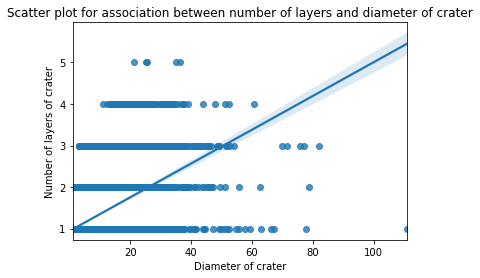

In [24]:
#Scatter plot to understand the relationship between NUMBER_LAYERS and DIAM_CIRCLE_IMAGE
p3 = sns.regplot(y = 'NUMBER_LAYERS',x = 'DIAM_CIRCLE_IMAGE', fit_reg = True ,data = data)
plt.ylabel('Number of layers of crater')
plt.xlabel('Diameter of crater')
plt.title('Scatter plot for association between number of layers and diameter of crater')
print(p3)